<H1><center><font color='brown'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='brown'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Feature Engineering
2. Modeling and Hyperparameter Tuning 
3. Evaluasi Model
4. Conclusion and Recommendation
5. Save Model

----
----

<h2><strong><span style="background-color: yellow; padding: 5px;">0. Initial Setup</span></strong></h2>

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalance data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.combine import SMOTEENN

# Model Selection
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.metrics import roc_auc_score, average_precision_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Pipeline
from imblearn.pipeline import Pipeline

# Interpretasi Model
import shap

# Saving Model
import pickle

import warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### **Import File**

File yang akan digunakan pada part 3.0-Modeling ini didapatkan dari folder data processed

In [3]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Final Project\data\processed\\bank_additional_data_for_ml.csv")

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (39910, 19)


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
35887,24.0,Other,single,Secondary Education,no,no,cellular,jul,wed,1.0,999.0,1.0,failure,-2.9,92.469,-33.6,1.029,5076.2,0
20996,29.0,Employee,married,Higher Education,yes,no,cellular,aug,wed,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
22889,44.0,Employee,married,Higher Education,no,no,cellular,aug,thu,2.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
7069,35.0,Employee,single,Secondary Education,yes,yes,telephone,may,thu,7.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
15466,44.0,Employee,married,Secondary Education,yes,no,cellular,jul,tue,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36841,76.0,Other,married,Primary Education,yes,no,cellular,sep,wed,2.0,3.0,1.0,success,-3.4,92.379,-29.8,0.781,5017.5,1
13184,46.0,Employee,single,Primary Education,yes,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
17627,40.0,Employee,married,Secondary Education,no,no,cellular,jul,wed,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
39317,45.0,Employee,married,Higher Education,no,no,cellular,sep,wed,2.0,3.0,2.0,success,-1.1,94.199,-37.5,0.886,4963.6,1
11791,38.0,Employee,married,Primary Education,yes,no,telephone,jul,thu,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0


<h2><strong><span style="background-color: yellow; padding: 5px;">1. Feature Engineering</span></strong></h2>

Pada bagian `Feature Engineering` ini kita akan melakukan **Scaling** dan **Encoding** pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Proses Scaling dan Encoding yang akan dilakukan pada dataset ini ialah sebagai berikut:

### **1.1 Scaling**

[Scaling](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#83e6) adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama

Teknik scaling yang dilakukan dalam tahap preprocessing ini akan menggunakan teknik **`Robust Scaler`**. [Robust scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) ini sendiri adalah salah satu teknik yang digunakan untuk mengubah skala atau transformasi data agar cocok untuk digunakan dalam model machine learning. Dimana Robust Scaler ini digunakan ketika kita memiliki dataset yang mengandung outlier, karena teknik ini tidak terpengaruh oleh nilai ekstrem, dan teknik ini cocok digunakan ketika data tidak mengikuti distribusi normal. Namun teknik ini memiliki kekurangan yaitu teknik ini tidak mengubah distribusi data menjadi distribusi normal. Berikut kita akan menerapkan teknik Robust Scaler kedalam dataset yang kita miliki

In [4]:
# data unik di tiap kolom

numeric_features  = df.describe().columns
numeric_features = numeric_features.drop('Deposit')

Cara kerja dari teknik `Robust Scaler` ini ialah akan mengubah skala data dengan menggunakan nilai median dan IQR dari data

### **1.2 Encoding**

[Encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Berikut kita akan menerapkan dan mendefinisikan metode teknik encoding yang sesuai dengan data yang kita miliki

In [5]:
# data unik di tiap kolom

listItem = []
for col in df.describe(include='object').columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

df_object = pd.DataFrame(columns=['feature', 'n_unique', 'sample_unique'],
                     data=listItem)
df_object

,feature,n_unique,sample_unique
0,job,4,"[Employee, Entrepreneur, Other, Unemployed]"
1,marital,3,"[divorced, married, single]"
2,education,4,"[Higher Education, Other, Primary Education, S..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,10,"[apr, aug, dec, jul, jun, mar, may, nov, oct, ..."
7,day_of_week,5,"[fri, mon, thu, tue, wed]"
8,poutcome,3,"[failure, nonexistent, success]"


__Insight:__
* Akan dilakukan **Ordinal Encoding** untuk fitur `education`, `month`, dan `day_of_week`. Alasan memilih **Ordinal Encoding**  karena fitur ini memiliki variabel ordinal, yaitu variabel yang tiap kategorinya memiliki tingkatan penting. **Ordinal encoding** akan memberikan nilai unik kepada setiap kategori berdasarkan posisinya dalam urutannya
* Akan dilakukan **One Hot Encoding** untuk fitur `housing`, `loan`, `contact`, `poutcome`, `job`, dan `marital`. Alasan dipilihnya **One Hot Encoding** karena teknik ini akan mengganti setiap nilai kategori dengan nilai biner yang memiliki panjang sesuai dengan jumlah kategori unik dalam kolom kategori tersebut, dan fitur-fitur tersebut tidak memiliki jumlah kategori yang terlalu banyak

Langkah pertama adalah kita akan mengurutkan nilai dari fitur `education`, `month`, dan `day_of_week` berdasarkan tingkatannya, kemudian kita akan memberikan nomor pada masing-masing nilai berdasarkan tingkatannya tersebut (ordinal mapping), sebagai berikut:

In [6]:
# Ordinal mapping kolom education

ordinal_mapping = [
    {'col':'education',
    'mapping':{
        'Primary Education' : 0, 
        'Secondary Education' : 1, 
        'Higher Education': 2, 
        'Other' : -1,
    }},
    {'col':'month',
    'mapping':{
        'jan' : 0,
        'feb' : 1,
        'mar' : 2,
        'apr' : 3,
        'may' : 4,
        'jun' : 5,
        'jul' : 6,
        'aug' : 7,
        'sep' : 8,
        'oct' : 9,
        'nov' : 10,
        'dec' : 11,
    }},
    {'col':'day_of_week',
    'mapping':{
        'mon' : 0, 
        'tue' : 1, 
        'wed' : 2, 
        'thu' : 3,
        'fri' : 4,
    }}
]

In [7]:
# Define encoder

# One Hot Encoding
onehot_features = ['housing', 'loan', 'contact', 'poutcome', 'job', 'marital']

# Ordinal Encoding
ordinal_features = ['education', 'month', 'day_of_week']

Cara kerja **encoding** adalah dengan menggantikan nilai-nilai kategori dengan representasi numerik sesuai dengan teknik encoding yang dipilih. Hal ini memungkinkan algoritma machine learning untuk bekerja dengan data kategorikal dan memahami hubungan antara kategori tersebut. Untuk dapat memahami cara kerja dari masing-masing teknik encoding diatas, dapat dicek [disini](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

### **1.3 Define Column Transformer**

In [8]:
# encoding, scaling features

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), onehot_features),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ordinal_features),
    ('robust', RobustScaler(), numeric_features)
], remainder='passthrough')

### **1.4 Data Splitting**, bagi dataset menjadi df_seen dan df_unseen

Idenya adalah ketika kita melakukan evaluasi terhadap model machine learning, kita ingin mendapatkan model yang dapat men-generalisir serta akurat. Dalam melakukan generalisasi kita perlu membagi data menjadi 3 bagian, yaitu `training set`, `validation set`, dan `test set`. Dengan penjelasan sebagai berikut:
* Dataset akan kita bagi menjadi **df_seen** dan **df_unseen**
* **df_seen** yang kemudian akan kita bagi lagi menjadi `X_train`, `X_val`, `y_train`, `y_val` (untuk data training set dan data validasi set)
* **df_unseen** yang akan menjadi data `test set` pada model kita nanti

In [9]:
# Melakukan data splitting

# Membagi feature dan target
feature=df.drop(columns=['Deposit']).columns
target='Deposit'

# Membagi dataset df_seen dan df_unseen dari dataset df
df_seen, df_unseen=train_test_split(df,
                                    stratify=df["Deposit"].values, 
                                    test_size=0.2,random_state=0)

# Membagi dataset train dan validation dari df_seen
X_train, X_val, y_train, y_val=train_test_split(df_seen[feature], df_seen[target], 
                                                stratify=df_seen["Deposit"].values, 
                                                test_size=0.2, random_state=0)

print(f"df_seen\nJumlah baris: {df_seen.shape[0]} baris\nJumlah kolom: {df_seen.shape[1]} kolom\n")
print(f"df_unseen\nJumlah baris: {df_unseen.shape[0]} baris\nJumlah kolom: {df_unseen.shape[1]} kolom\n")
print("=========================")
print(f"\nX_train\nJumlah baris: {X_train.shape[0]} baris\nJumlah kolom: {X_train.shape[1]} kolom\n")
print(f"X_val\nJumlah baris: {X_val.shape[0]} baris\nJumlah kolom: {X_val.shape[1]} kolom")

df_seen
Jumlah baris: 31928 baris
Jumlah kolom: 19 kolom

df_unseen
Jumlah baris: 7982 baris
Jumlah kolom: 19 kolom


X_train
Jumlah baris: 25542 baris
Jumlah kolom: 18 kolom

X_val
Jumlah baris: 6386 baris
Jumlah kolom: 18 kolom


Maka kita sudah memiliki data untuk `training`, `validasi` dan `tes set`, kemudian kita akan melakukan fit_transform untuk `df_seen` dan kita lihat fitur-fitur dari hasil **scaling** dan **encoding** diatas

In [10]:
testing = pd.DataFrame(preprocessor.fit_transform(df_seen),columns=preprocessor.get_feature_names_out())
testing.head()

,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__poutcome_nonexistent,onehot__poutcome_success,onehot__job_Entrepreneur,onehot__job_Other,onehot__job_Unemployed,onehot__marital_married,onehot__marital_single,...,robust__age,robust__campaign,robust__pdays,robust__previous,robust__emp.var.rate,robust__cons.price.idx,robust__cons.conf.idx,robust__euribor3m,robust__nr.employed,remainder__Deposit
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.666667,-0.5,-996.0,1.0,-1.40625,-0.865071,1.857143,-1.145424,-1.344961,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.466667,0.5,0.0,0.0,-0.90625,-0.599565,-0.698413,-0.992812,-0.712403,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.200000,0.0,0.0,0.0,-0.37500,-0.265506,-0.031746,-0.184130,0.037209,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.466667,0.0,0.0,0.0,-0.90625,-0.599565,-0.698413,-0.985900,-0.712403,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.466667,3.5,0.0,0.0,0.09375,0.000000,0.904762,0.029030,0.287597,0.0


### **1.5 Resampler**

Seperti yang sudah kita analisis pada bagian data understanding dan EDA, bahwa dataset yang kita miliki ialah data imbalanced dengan proporsi **data mayoritas sebesar 89%** dan **data minoritas sebesar 11%**. Imbalance data akan mengakibatkan model machine learning yang kita buat menjadi bias, yaitu model akan cenderung memprediksi kelas mayoritas dengan akurasi tinggi karena ada lebih banyak sampel dalam kelas tersebut, dan seringkali mengabaikan kelas minoritas. Oleh karena itu untuk memperbaiki ketidakseimbangan data (data imblance), kita akan gunakan `teknik resampling`. Teknik resampling yang akan kita gunakan ialah sebagai berikut:

In [11]:
# Mendefinisikan teknik resample yang akan digunakan

# Random Over Sampling
ros = RandomOverSampler(random_state=0)

# SMOTE, termasuk kedalam teknik Oversampling
smote = SMOTE(random_state=0)

# Random Under Sampling
rus = RandomUnderSampler(random_state=0)

# Nearmiss, termasuk kedalam teknik Undersampling
nearmiss = NearMiss()

# Gabungan Over dan Under Sampling
smoteenn = SMOTEENN(random_state=0)

### <font size="4.5">Setelah dilakukan treatment pada tahap `Data Preprocesing` pada langkah diatas, maka kita `menganggap` data yang kita miliki sudah bersih dan siap untuk dilakukan modeling</font>

<h2><strong><span style="background-color: yellow; padding: 5px;">2. Modeling and Hyperparameter Tuning</span></strong></h2>

### **2.1 Modeling**, choose the best banchmark model

#### **2.1.1 Model Experiment**

Models experiment yang akan kita coba sebagai penentuan model terbaik untuk dataset ini antara lain **Logistic Regression**, **KNearest Neighbour Classifier**, **Decision Tree Classifier**, **Random Forest Classifier**, **Bagging Classifier**, **Ada Boost Classifier**, **Gradient Boosting Classifier**, **XGB Classifier**, **LGBM Classifier**, dan **SVM**.

In [12]:
# Mendefinisikan models yang akan digunakan

# Logistic Regression
logreg = LogisticRegression(random_state=0)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
ada = AdaBoostClassifier(random_state=0)

# Gradientboost
gbc = GradientBoostingClassifier(random_state=0)

# CatBoosting
catboost = CatBoostClassifier(random_state=0, verbose=False)

#### **2.1.2 Membandingkan Teknik Resampling**

Agar memudahkan dan mengefisiensikan penulisan kode program, maka kita akan membuat fungsi untuk mendapatkan nilai dari masing-masing teknik resampling naik itu untuk data **train set**, dan data **validation set**

In [13]:
# Fungsi untuk Teknik Resampling ke data train

def resampler_to_train_set(resampler):
    # hyperparameter default

    # Pilihan model yang akan digunakan
    models = [logreg,knn,dt,rf,ada,gbc,catboost]

    # ROC_AUC
    scoreROC_AUC=[]
    rataROC_AUC=[]
    stdROC_AUC=[]


    for i in models:
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess', preprocessor),
            ('resample', resampler),
            ('model to train set', i)])
    
        # Matriks ROC_AUC
        modelCVROC_AUC=cross_val_score(estimator, X_train , y_train,cv=skfold,scoring="roc_auc")
        scoreROC_AUC.append(modelCVROC_AUC)
        rataROC_AUC.append(modelCVROC_AUC.mean())
        stdROC_AUC.append(modelCVROC_AUC.std())


    df_resampler_train = pd.DataFrame({'model to train set':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Cat Boosting'],
                'Mean ROC_AUC':rataROC_AUC,
                'Std ROC_AUC':stdROC_AUC
                }
                ).set_index('model to train set').sort_values(by='Mean ROC_AUC',ascending=False)
    
    return df_resampler_train

In [14]:
# Fungsi untuk Teknik Resampling ke data test

def resampler_to_val_set(resampler, matrics):
    # Optimasi model benchmark

    # Pilihan model yang akan digunakan
    models = [logreg,knn,dt,rf,ada,gbc,catboost]
    list_score = []

    # Mencari model terbaik berdasarkan business score terbesar dan std terkecil
    for i in models :
        
        estimator = Pipeline([
            ('preprocess', preprocessor),
            ('resample', resampler),
            ('model to val set', i)
        ])

        # fitting
        estimator.fit(X_train, y_train)

        # predict
        y_pred = estimator.predict(X_val)

        # evaluate
        score = matrics(y_val, y_pred)
        list_score.append(score)

    # Perbandingan performa antar model
    df_resampler_predict = pd.DataFrame({
        'model to val set':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Cat Boosting'],
        'ROC_AUC (val_set)': list_score,
    }).sort_values('ROC_AUC (val_set)', ascending=False)

    return df_resampler_predict

##### **2.1.2.1 ROS** (Random Over Sampling)

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `ROS (Random Over Sampling)` pada **data train** dan pada **data validation**

In [15]:
# Resampler Random Over Sampling pada data train
df_ros_train = resampler_to_train_set(ros)
df_ros_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.794736,0.003352
Ada Boosting,0.786521,0.006993
Cat Boosting,0.777628,0.009227
Logistic Regression,0.774027,0.007449
Random Forest,0.763877,0.006608
KNN,0.712207,0.008841
Decision Tree,0.617361,0.015617


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `ROS (Random Over Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7958`, dengan nilai **Standar Deviasi** sebesar `0.0040`

Selanjutnya kita akan predict ke data validation berikut:

In [16]:
# Resampler Random Over Sampling pada data validation
df_ros_predict = resampler_to_val_set(ros, roc_auc_score)
df_ros_predict

,model to val set,ROC_AUC (val_set)
5,Gradient Boosting,0.756461
6,Cat Boosting,0.743410
4,Ada Boosting,0.738627
0,Logistic Regression,0.731311
1,KNN,0.659153
3,Random Forest,0.655614
2,Decision Tree,0.618959


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `ROS (Random Over Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7568`

##### **2.1.2.2 SMOTE**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `SMOTE` pada **data train** dan pada **data validation**

In [17]:
# Resampler SMOTE pada data train
df_smote_train = resampler_to_train_set(smote)
df_smote_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Cat Boosting,0.784107,0.009479
Gradient Boosting,0.781401,0.009413
Logistic Regression,0.772935,0.009729
Random Forest,0.770215,0.006112
Ada Boosting,0.765191,0.004493
KNN,0.726515,0.009041
Decision Tree,0.626741,0.008566


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `SMOTE` menghasilkan `Cat Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7845`, dengan nilai **Standar Deviasi** sebesar `0.0076`

Selanjutnya kita akan predict ke data validation berikut:

In [18]:
# Resampler SMOTE pada data validation
df_smote_predict = resampler_to_val_set(smote, roc_auc_score)
df_smote_predict

,model to val set,ROC_AUC (val_set)
0,Logistic Regression,0.730826
4,Ada Boosting,0.721502
5,Gradient Boosting,0.712130
1,KNN,0.672852
3,Random Forest,0.654304
6,Cat Boosting,0.637737
2,Decision Tree,0.624948


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `SMOTE` menghasilkan `Logistic Regression` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7312`

##### **2.1.2.3 RUS** (Random Under Sampling)

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `RUS (Random Under Sampling)` pada **data train** dan pada **data validation**

In [19]:
# Resampler Random Under Sampling pada data train
df_rus_train = resampler_to_train_set(rus)
df_rus_train


,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.792930,0.003653
Cat Boosting,0.791070,0.004798
Ada Boosting,0.783818,0.007898
Random Forest,0.774912,0.006584
Logistic Regression,0.774446,0.007427
KNN,0.745521,0.005703
Decision Tree,0.638560,0.007148


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `RUS (Random Under Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7927`, dengan nilai **Standar Deviasi** sebesar `0.0035`

Selanjutnya kita akan predict ke data validation berikut:

In [20]:
# Resampler Random Under Sampling pada data validation
df_rus_predict = resampler_to_val_set(rus, roc_auc_score)
df_rus_predict

,model to val set,ROC_AUC (val_set)
6,Cat Boosting,0.751325
5,Gradient Boosting,0.749471
4,Ada Boosting,0.736494
0,Logistic Regression,0.732665
3,Random Forest,0.729677
1,KNN,0.696848
2,Decision Tree,0.633867


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `RUS (Random Under Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7544`

##### **2.1.2.4 Nearmiss**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `Nearmiss` pada **data train** dan pada **data validation**

In [21]:
# Resampler Nearmiss pada data train
df_nearmiss_train = resampler_to_train_set(nearmiss)
df_nearmiss_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Random Forest,0.719982,0.012452
KNN,0.708805,0.012611
Gradient Boosting,0.704188,0.008691
Cat Boosting,0.702102,0.009892
Logistic Regression,0.701447,0.006485
Ada Boosting,0.701206,0.012827
Decision Tree,0.594739,0.008063


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `Nearmiss` menghasilkan `Random Forest` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7062`, dengan nilai **Standar Deviasi** sebesar `0.0138`

Selanjutnya kita akan predict ke data validation berikut:

In [22]:
# Resampler Nearmiss pada data validation
df_nearmiss_predict = resampler_to_val_set(nearmiss, roc_auc_score)
df_nearmiss_predict

,model to val set,ROC_AUC (val_set)
1,KNN,0.653097
4,Ada Boosting,0.620910
0,Logistic Regression,0.603798
5,Gradient Boosting,0.603649
6,Cat Boosting,0.594054
3,Random Forest,0.587269
2,Decision Tree,0.577559


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `Nearmiss` menghasilkan `KNN` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.6264`

##### **2.1.2.5 SMOTEENN**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `SMOTEENN` pada **data train** dan pada **data validation**

In [23]:
# Resampler SMOTEEN pada data train
df_smoteenn_train = resampler_to_train_set(smoteenn)
df_smoteenn_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.787936,0.006545
Cat Boosting,0.786254,0.007196
Random Forest,0.779920,0.006656
Ada Boosting,0.773872,0.011742
Logistic Regression,0.754514,0.036617
KNN,0.726287,0.005576
Decision Tree,0.707740,0.009219


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `SMOTEENN` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7885`, dengan nilai **Standar Deviasi** sebesar `0.0055`

Selanjutnya kita akan predict ke data validation berikut:

In [24]:
# Resampler SMOTEENN pada data validation
df_smoteenn_predict = resampler_to_val_set(smoteenn, roc_auc_score)
df_smoteenn_predict

,model to val set,ROC_AUC (val_set)
5,Gradient Boosting,0.745530
3,Random Forest,0.741380
4,Ada Boosting,0.737730
6,Cat Boosting,0.737364
0,Logistic Regression,0.730340
2,Decision Tree,0.711023
1,KNN,0.693258


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `SMOTEEN` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7438`

#### **2.1.3 Teknik Resampling Terpilih**

Summary dari hasil teknik resampling diatas ialah sebagai berikut:

In [25]:
# Perbandingan teknik resampling pada data train

df_ros_train['Label'] = 'ROS Train'
df_smote_train['Label'] = 'SMOTE Train'
df_rus_train['Label'] = 'RUS Train'
df_nearmiss_train['Label'] = 'NearMiss Train'
df_smoteenn_train['Label'] = 'SMOTEENN Train'

display(df_ros_train.head(3), df_smote_train.head(3), df_rus_train.head(3), df_nearmiss_train.head(3), df_smoteenn_train.head(3), 
        )

,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.794736,0.003352,ROS Train
Ada Boosting,0.786521,0.006993,ROS Train
Cat Boosting,0.777628,0.009227,ROS Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Cat Boosting,0.784107,0.009479,SMOTE Train
Gradient Boosting,0.781401,0.009413,SMOTE Train
Logistic Regression,0.772935,0.009729,SMOTE Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.792930,0.003653,RUS Train
Cat Boosting,0.791070,0.004798,RUS Train
Ada Boosting,0.783818,0.007898,RUS Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Random Forest,0.719982,0.012452,NearMiss Train
KNN,0.708805,0.012611,NearMiss Train
Gradient Boosting,0.704188,0.008691,NearMiss Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.787936,0.006545,SMOTEENN Train
Cat Boosting,0.786254,0.007196,SMOTEENN Train
Random Forest,0.779920,0.006656,SMOTEENN Train


In [26]:
# Perbandingan teknik resampling pada data validation

df_ros_predict['Label'] = 'ROS Predict'
df_smote_predict['Label'] = 'SMOTE Predict'
df_rus_predict['Label'] = 'RUS Predict'
df_nearmiss_predict['Label'] = 'NearMiss Predict'
df_smoteenn_predict['Label'] = 'SMOTEENN Predict'

display(df_ros_predict.head(3), df_smote_predict.head(3), df_rus_predict.head(3), df_nearmiss_predict.head(3), df_smoteenn_predict.head(3))

,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.756461,ROS Predict
6,Cat Boosting,0.743410,ROS Predict
4,Ada Boosting,0.738627,ROS Predict


,model to val set,ROC_AUC (val_set),Label
0,Logistic Regression,0.730826,SMOTE Predict
4,Ada Boosting,0.721502,SMOTE Predict
5,Gradient Boosting,0.712130,SMOTE Predict


,model to val set,ROC_AUC (val_set),Label
6,Cat Boosting,0.751325,RUS Predict
5,Gradient Boosting,0.749471,RUS Predict
4,Ada Boosting,0.736494,RUS Predict


,model to val set,ROC_AUC (val_set),Label
1,KNN,0.653097,NearMiss Predict
4,Ada Boosting,0.620910,NearMiss Predict
0,Logistic Regression,0.603798,NearMiss Predict


,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.74553,SMOTEENN Predict
3,Random Forest,0.74138,SMOTEENN Predict
4,Ada Boosting,0.73773,SMOTEENN Predict


Dari hasil teknik resampling diatas, didapatkan bahwa hasil dari `cross-validation` menunjukkan penggunaan `teknik ROS (Random Over Sampling) memiliki nilai yang lebih baik dari pada teknik resampling lainnya` dan `memiliki nilai standar deviasi terendah dari teknik resampling lain` oleh karena itu `teknik resampling ROS (Random Over Sampling)` akan kita gunakan pada tahap **hyperparameter tuning**. Selain itu, pada teknik resampling ROS ini memiliki model **Gradient Boosting** yang cukup tinggi yaitu sebesar **0.7948** pada **data train** dan memiliki `score ROC_AUC` **`0.7585`** pada **data validation**.

In [27]:
# Cek hasil cross-validation dengan teknik resampling terbaik

display(df_ros_train.head(3), df_ros_predict.head(3))

,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.794736,0.003352,ROS Train
Ada Boosting,0.786521,0.006993,ROS Train
Cat Boosting,0.777628,0.009227,ROS Train


,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.756461,ROS Predict
6,Cat Boosting,0.743410,ROS Predict
4,Ada Boosting,0.738627,ROS Predict


Dari tabel diatas, dapat kita lihat bahwa ketiga model diatas merupakan **model terbaik dengan nilai tertinggi**, sehingga kita selanjutnya akan menggunakan model `Gradient Boosting`, `Ada Boosting`, dan `Cat Boosting` untuk dijadikan model yang akan dituning pada proses **Hyperparameter Tuning**

### **2.2 Hyperparameter Tuning**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Gradient Boosting`, `Ada Boosting`, dan `Cat Boosting`, dengan harapan model lebih optimal.

#### **2.2.1 Model `Gradient Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Gradient Boosting`, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:
* `max_depth` = Menentukan kedalaman maksimum dari setiap pohon
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `n_estimator` = Jumlah pohon
* `subsample` = Proporsi sampel yang digunakan untuk pelatihan setiap pohon (% dari total baris train set)
* `max_features` = Jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

In [28]:
# Gradient Boost Hyperparameter Tuning

pipe_gradboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model', gbc)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_gradboost = {
    'model__max_depth': [3,5],
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100,200],
    'model__subsample': [0.8,1],
    'model__max_features': [55, 100]
}

# Hyperparameter tuning
gradboost_grid = GridSearchCV(
    estimator = pipe_gradboost,
    param_grid = hyperparam_gradboost,
    cv = skfold,
    scoring = 'roc_auc'
)

# fitting
gradboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5],
                         'model__max_features': [55, 100],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1]},
             scoring='roc_auc')

In [29]:
# Gradient Boost best_score, best_params

print('Gradient Boost Hyperparameter')
print(gradboost_grid.best_score_)
print(gradboost_grid.best_params_)

Gradient Boost Hyperparameter
0.7976763877508071
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__max_features': 55, 'model__n_estimators': 100, 'model__subsample': 0.8}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Gradient Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7976`. Dengan **model__learning_rate: 0.1**, **model__max_depth: 3**, **model__max_features: 55*, **model__n_estimators: 100**, dan **model__subsample: 0.8**

#### **2.2.2 Model `Ada Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Ada Boosting`, dengan harapan model lebih optimal. Beberapa parameter yang akan dituning antara lain:
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `n_estimator` = Jumlah pohon

In [30]:
# Ada Boost Hyperparameter Tuning

pipe_adaboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model', ada)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_adaboost = {
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [50,100,200]
}

# Hyperparameter tuning
adaboost_grid = GridSearchCV(estimator = pipe_adaboost,
    param_grid = hyperparam_adaboost,
    cv = skfold,
    scoring = 'roc_auc',
    verbose = False
)

# fitting
adaboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
                                                                         RobustScaler(),
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=False)

In [31]:
# Ada Boost best_score, best_params

print('Ada Boost Hyperparameter')
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

Ada Boost Hyperparameter
0.7858279910435488
{'model__learning_rate': 0.1, 'model__n_estimators': 200}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Ada Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7858`. dengan **model__learning_rate: 0.1** dan **model__n_estimators: 200**

#### **2.2.3 Model `Cat Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Cat Boosting`, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `iterations` = Menentukan jumlah pohon (estimator) yang akan dibangun
* `depth` = Menentukan kedalaman maksimum dari setiap pohon
* `l2_leaf_reg` = Mengendalikan kekuatan regularisasi L2 untuk mengurangi overfitting

In [32]:
# Cat Boost Hyperparameter Tuning

pipe_catboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model_catboost', catboost)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_catboost = {
    'model_catboost__learning_rate': [0.01, 0.1],
    'model_catboost__iterations': [100, 200],
    'model_catboost__depth': [5, 10],
    'model_catboost__l2_leaf_reg': [10, 100]
}

# Hyperparameter tuning
catboost_grid = GridSearchCV(estimator = pipe_catboost,
    param_grid = hyperparam_catboost,
    cv = skfold,
    scoring = 'roc_auc',
    verbose = False
)

# fitting
catboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model_catboost',
                                        <catboost.core.CatBoostClassifier object at 0x000001C74E393340>)]),
             param_grid={'model_catboost__depth': [5, 10],
                         'model_catboost__iterations': [100, 200],
                         'model_catboost__l2_leaf_reg': [10, 100],
                         'model_catboost__learning_rate': [0.01, 0.1]},
             scoring='roc_auc', verbose=False)

In [33]:
# Cat Boost best_score, best_params

print('Cat Boost Hyperparameter')
print(catboost_grid.best_score_)
print(catboost_grid.best_params_)

Cat Boost Hyperparameter
0.7995385520649698
{'model_catboost__depth': 5, 'model_catboost__iterations': 100, 'model_catboost__l2_leaf_reg': 100, 'model_catboost__learning_rate': 0.1}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Cat Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7995`. Dengan **model_catboost__depth: 5**, **model_catboost__iterations: 100**, **model_catboost__l2_leaf_reg: 100**, **model_catboost__learning_rate: 0.1**

### **2.3 Summary Hyperparameter Tuning**

In [34]:
# Hyperparameter tunning best_estimator

hyperparameter_tuning = [gradboost_grid.best_estimator_, adaboost_grid.best_estimator_, catboost_grid.best_estimator_]

In [35]:
# List score model sesudah di tuned (val set)

list_score_aftertuned = []

for i in hyperparameter_tuning :

    # predict
    y_pred = i.predict(X_val)

    # evaluate
    score = roc_auc_score(y_val, y_pred)
    list_score_aftertuned.append(score)

In [36]:
# List score model sebelum di tuned (val set)

list_score_beforetuned = [df_ros_predict['ROC_AUC (val_set)'][5],df_ros_predict['ROC_AUC (val_set)'][6],df_ros_predict['ROC_AUC (val_set)'][4]]

In [37]:
# Perbandingan performa antar model sebelum dan sesudah tunning pada validation set

df_score_beforeaftertuned = pd.DataFrame({
    'model tuned':['Gradient Boosting', 'Ada Boosting', 'Cat Boosting'],
    'ROC_AUC (before tuning)' : list_score_beforetuned,
    'ROC_AUC (after tunning)': list_score_aftertuned,
}).sort_values('ROC_AUC (after tunning)', ascending=False)
df_score_beforeaftertuned

,model tuned,ROC_AUC (before tuning),ROC_AUC (after tunning)
0,Gradient Boosting,0.756461,0.753503
2,Cat Boosting,0.738627,0.752988
1,Ada Boosting,0.743410,0.738494


Setelah melakukan Tuning dan kita terapkan ke data validasi, didapatkan model `Gradient Boosting` sebagai **best model** untuk dataset ini. Kemudian pada data diatas setelah melakukan *hyperparameter tuning*, dapat dilihat selisih test `Gradient Boosting` before tunning dan tuned tidak berbeda jauh **ROC_AUC before tunning (0.7564)**, dan **ROC_AUC after tunning (0.7535)**. Maka kita akan memilih best model `Gradient Boosting` sebagai **model Machine Learning** dan memakai model `Gradient Boosting` sebelum di dilakukan tunning (**before tunning**) pada project ini.

### **2.4 Cara Kerja Model `Gradient Boosting`**

Algoritma Boosting adalah salah satu algoritma yang paling populer dan sering digunakan. Algoritma ini dapat dianggap sebagai salah satu teknik paling kuat untuk membangun model prediksi. Ide dasar dari Boosting, seperti halnya algoritma ensemble lainnya, adalah menggabungkan beberapa model pembelajar lemah menjadi satu yang lebih kuat. Model Boosting mencoba memprediksi secara berurutan, dan model berikutnya berusaha memperbaiki kesalahan dari pendahulunya. algoritma `Gradient Boosting` merupakan salah satu metode Ensemble, yaitu teknik yang membuat beberapa model dan kemudian menggabungkannya untuk menghasilkan hasil yang lebih baik. Metode Ensemble biasanya menghasilkan solusi yang lebih akurat daripada apa yang bisa dilakukan oleh satu model tunggal. Pada model `Gradient Boosting` ini mengandalkan intuisi bahwa model selanjutnya yang terbaik, ketika digabungkan dengan model sebelumnya, meminimalkan kesalahan prediksi keseluruhan. Ide kunci adalah menetapkan hasil target untuk model selanjutnya ini untuk meminimalkan kesalahan.

Pada dasarnya, `Gradient Boosting` melibatkan tiga komponen berikut ini:
1. Sebuah fungsi loss (kerugian) yang perlu dioptimalkan.
2. Gabungan week learner (pembelajar lemah) untuk membuat prediksi.
3. Sebuah model aditif untuk secara iteratif menambahkan pembelajar lemah guna meminimalkan loss function.

`Gradient Boosting` adalah algoritma yang sebetulnya cenderung overfitting pada data latihan. `Gradient Boosting` dapat menjadi lebih baik dengan menggunakan metode regularisasi yang memberikan evaluasi pada beberapa bagian dari algoritma, dan umumnya dapat meningkatkan kinerjanya. `Gradient Boosting` dimulai dengan membuat satu daun (leaf) daripada pohon. Daun ini mewakili perkiraan awal untuk bobot dari semua sampel. Ketika mencoba untuk memprediksi nilai kontinu, perkiraan pertama adalah nilai rata-rata, dan kemudian `Gradient Boosting` membangun sebuah pohon.Untuk memasang model Gradient Boost pada data, kita perlu mempertimbangkan beberapa parameter. Parameter-parameter ini meliputi kedalaman maksimum dari pohon, jumlah estimator, nilai learning rate, minimum sampel untuk split, minimum sampel untuk leaf, dan sebagainya.

Kelebihan dari Gradient Boosting adalah sebagai berikut:

1. Mengurangi bias.
2. Mengatasi nilai-nilai yang hilang dalam kumpulan data.
3. Fleksibel untuk menangani penyetelan hiperparameter.
4. Mengatasi kesalahan sebagai bagian dari fungsi kerugian melalui gradien turun.
5. Boosting klasifikasi dapat menangani masalah biner maupun multi-kelas.

**Gradient Boosting pada Machine Learning**


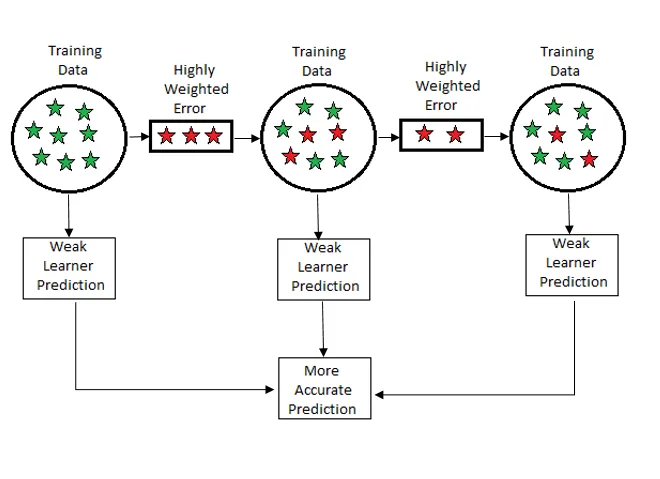


*Sumber*: https://pub.towardsai.net/fully-explained-gradient-boosting-technique-in-supervised-learning-d3e293ca70e1

### **2.5 Interpretasi Model**

#### **2.5.1 Features Importances**

In [38]:
# Set best_model best_estimator

best_model = gradboost_grid.best_estimator_

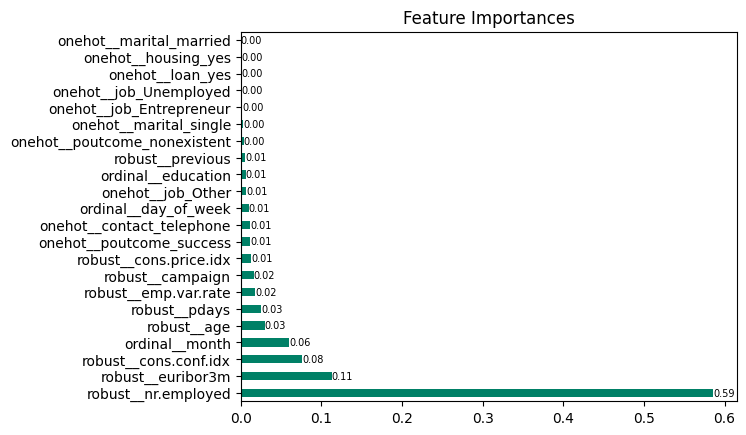

In [39]:
# Mencari feature importance pada best_model

coef1 = pd.Series(best_model["model"].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending = False)
ax = coef1.plot(kind='barh', title='Feature Importances', colormap="summer")

for i, v in enumerate(coef1):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center', size=7)

plt.show()

__Insight:__

Dari grafik diatas dapat dilihat faktor yang mempengaruhi potensi nasabah menggunakan produk Term Deposit dari model machine learning yang kita buat. Fitur yang paling penting adalah ***"nr.employed"*** (*indikator tenaga kerja*), ***"euribor3m"*** (*tingkat suku bunga 3 bulan terakhir*), dan ***"cons.conf.idx"*** (*tingkat konsumsi masyarakat*). 

#### **2.5.2 SHAP**

In [40]:
# Mendapatkan semua fitur modeling

feature_names = preprocessor.get_feature_names_out()

In [41]:
# Melakukan fit_transform dan fit_resample dari best_model

X_train_1 = best_model[0].fit_transform(X_train)
X_train_2, y_train_2 = best_model[1].fit_resample(X_train_1,y_train)

100%|===================| 45144/45300 [01:16<00:00]        

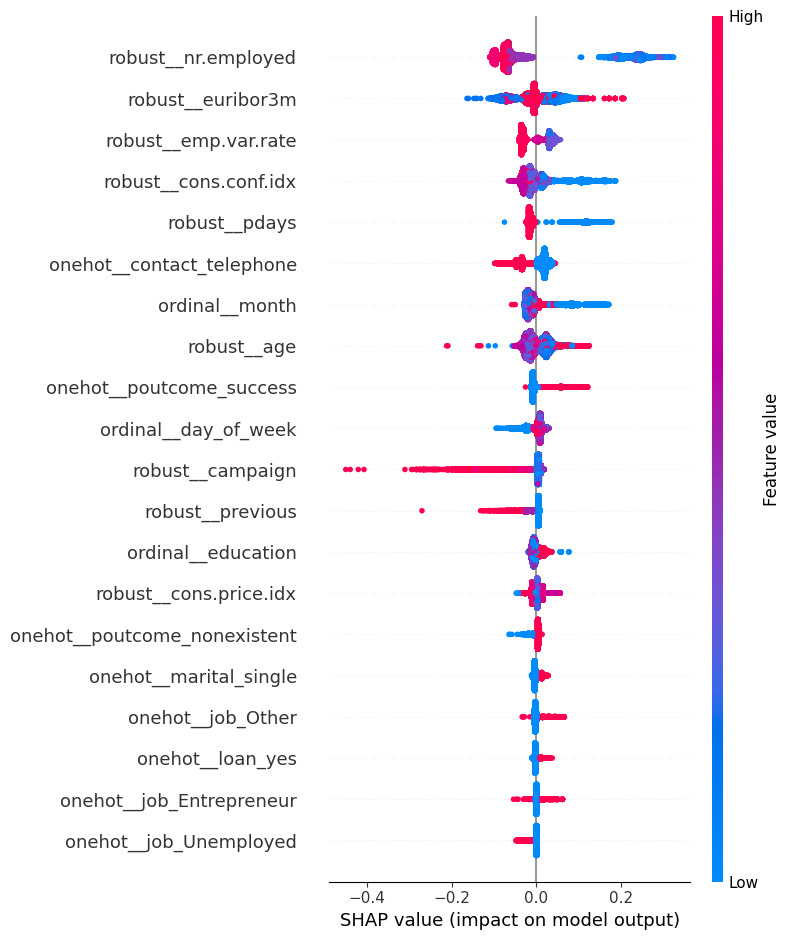

In [42]:
# SHAP Analysis

import shap

shap_values = shap.TreeExplainer(best_model[-1],
                                 data = X_train_2,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_2)
                                 
shap.summary_plot(shap_values, X_train_2,feature_names = feature_names)

__Insight:__
- Semakin kecil nilai `indeks tenaga kerja` negara portugal, maka nasabah cendrung melakukan term deposit
- Untuk `indikator euribor` cenderung variatif, dimana untuk semua nilai cenderung melakukan term deposit
- Semakin kecil `Employment Variant Rate`, maka nasabah cendrung melakukan term deposit
- Semakin kecil nilai `indikator kinerja perekonomian` negara portugal, maka nasabah cendrung melakukan term deposit
- Semakin kecil `rentang hari saat nasabah terakhir kali dihubungi`, maka nasabah cendrung melakukan term deposit
- Apabila nasabah tidak dihubungi lewat `telefon selular`, maka nasabah cendrung melakukan term deposit
- Untuk `bulan dihubungi` cenderung variatif, dimana untuk semua bulan cenderung melakukan term deposit
- Untuk `umur` cendrung variatif, dimana ada range umur tertentu yang cendrung melakukan term deposit
- Jika nasabah `menerima produk pada kampanye sebelumnya`, maka nasabah cendrung melakukan term deposit

### **2.6 Limitasi Model**

In [43]:
# Check karakteristik dataset

InitialAss = pd.DataFrame(
        {
        'feature': df.columns.values,
        'unique_value': [df[col].unique() for col in df.columns]
        }
    )
pd.set_option('max_colwidth', None)
InitialAss

,feature,unique_value
0,age,"[56.0, 57.0, 37.0, 40.0, 45.0, 59.0, 41.0, 24.0, 25.0, 29.0, 35.0, 54.0, 46.0, 50.0, 39.0, 30.0, 55.0, 49.0, 34.0, 52.0, 32.0, 38.0, 44.0, 42.0, 60.0, 53.0, 47.0, 51.0, 48.0, 33.0, 31.0, 43.0, 58.0, 36.0, 28.0, 27.0, 26.0, 22.0, 23.0, 20.0, 21.0, 19.0, 18.0, 70.0, 61.0, 66.0, 76.0, 73.0, 88.0, 95.0, 77.0, 68.0, 75.0, 63.0, 80.0, 62.0, 65.0, 72.0, 82.0, 64.0, 67.0, 71.0, 69.0, 78.0, 85.0, 79.0, 83.0, 81.0, 74.0, 17.0, 87.0, 91.0, 98.0, 94.0, 86.0, 84.0, 92.0, 89.0]"
1,job,"[Employee, Other, Unemployed, Entrepreneur]"
2,marital,"[married, single, divorced]"
3,education,"[Primary Education, Secondary Education, Other, Higher Education]"
4,housing,"[no, yes]"
5,loan,"[no, yes]"
6,contact,"[telephone, cellular]"
7,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,"[mon, tue, wed, thu, fri]"
9,campaign,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 18.0, 14.0, 16.0, 17.0, 15.0, 19.0]"


#### - Limitasi pada fitur `age`

In [44]:
df.age.describe()

count    39910.000000
mean        40.020947
std         10.425081
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

__Insight:__

Model hanya dapat memprediksi nasabah-nasabah dengan minimal umur 17 tahun dan maksimal umur 98 tahun

#### - Limitasi pada fitur `job`

In [45]:
df.job.unique()

array(['Employee', 'Other', 'Unemployed', 'Entrepreneur'], dtype=object)

__Insight:__

Untuk fitur `job`, kita sudah mengelompokan pekerjaan calon nasabah kedalam beberapa jenis pekerjaan seperti berikut:
* **Employee**: admin, blue-collar, housemaid, management, services, dan technician
* **Unemployed**: unemployed
* **Entrepreneur**: entrepreneur, self-employed
* **Other**: retired, student

#### - Limitasi pada fitur `education`

In [46]:
df.education.unique()

array(['Primary Education', 'Secondary Education', 'Other',
       'Higher Education'], dtype=object)

__Insight:__

Untuk fitur `education`, kita sudah mengelompokan pendidikan terakhir calon nasabah kedalam beberapa kategori sebagai berikut:
* **Primary Education**: basic.4y, basic.6y, basic.9y
* **Secondary Education**: high.school, professional.course
* **Higher Education**: university.degree
* **Other**: illiterate

#### - Limitasi pada fitur `housing` dan `loan`

In [47]:
df.housing.unique()

array(['no', 'yes'], dtype=object)

In [48]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

__Insight:__

Pada model yang dibuat ini, status apakah nasabah memiliki cicilan rumah atau memiliki pinjaman adalah yes dan no. Sehingga untuk status nasabah yang lain (unknown) belum bisa maksimal untuk bekerja pada machine learning

#### - Limitasi pada fitur `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, dan `nr.employed`

In [49]:
df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000
mean,0.075843,93.572055,-40.503453,3.615029,5166.804558
std,1.571486,0.577965,4.636142,1.735830,72.295700
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


__Insight:__

Beberapa insight yang dapat dijadikan limitasi model untuk fitur-fitur indikator global sebagai berikut:
* Employment Variation Rate berada di rentang -3.4 - 1.4
* Consumer Price Index berada di rentang 92.201 - 94.767
* Consumer Confidence Index berada di rentang -50.8 - -26.9
* Euribor 3 Month Rate berada di rentang 0.634 - 5.045
* Indikator tenaga kerja Global berada di rentang 4963.6 - 5228.1

#### <font size="4.5">Untuk rangkuman limitasi model akan disampaikan lebih lengkap pada bagian Conclusion</font>

<h2><strong><span style="background-color: yellow; padding: 5px;">3. Evaluasi Model</span></strong></h2>

Pertama kita akan bagi **`df_unseen`** menjadi **X_test** dan **y_test**

In [50]:
# Melakukan data splitting terhadap df_unseen

X_test = df_unseen.drop(columns='Deposit')
y_test = df_unseen['Deposit']

In [51]:
# Melihat ROC_AUC Score terhadap x_test

y_pred_Xtest= pipe_gradboost.predict(X_test)
y_pred_proba_Xtest = pipe_gradboost.predict_proba(X_test)

roc_auc_Xtest = roc_auc_score(y_test, y_pred_proba_Xtest[:,1])

In [52]:
# Evaluasi model

report = classification_report(y_test, y_pred_Xtest)
print(report)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Xtest).ravel()
print(f"TN: {tn} | FP: {fp}\nFN: {fn}  | TP: {tp}")

print('\nROC_AUC Score (X_test) Gradient Boosting : ', roc_auc_Xtest)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7078
           1       0.42      0.59      0.49       904

    accuracy                           0.86      7982
   macro avg       0.68      0.74      0.70      7982
weighted avg       0.88      0.86      0.87      7982

TN: 6345 | FP: 733
FN: 375  | TP: 529

ROC_AUC Score (X_test) Gradient Boosting :  0.7945301970208073


__Insight__:

- ROC AUC (Area Under the Receiver Operating Characteristic Curve) mengukur sejauh mana model dapat membedakan antara kelas positif dan negatif dengan mengamati perbandingan True Positive Rate (Recall) dan False Positive Rate (FPR) pada berbagai ambang batas pemutusan.
- Nilai ROC AUC menunjukkan sejauh mana model dapat memisahkan kelas positif dan negatif, dengan rentang nilai antara 0 hingga 1.
- Nilai ROC AUC adalah sekitar 0.59. Nilai ini menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.

Dalam kasus ini, dengan ROC AUC sekitar 0.59, model memiliki kemampuan yang baik dalam membedakan antara nasabah yang akan membuka rekening deposito (kelas positif) dan nasabah yang tidak akan membuka rekening deposito (kelas negatif). Lebih spesifik:

- Nilai ROC AUC yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk mengidentifikasi nasabah yang benar-benar akan membuka rekening deposito (True Positives) dan untuk menghindari kesalahan prediksi bahwa nasabah akan membuka rekening deposito padahal sebenarnya tidak (False Positives).

- Dalam hal ini, ROC AUC sekitar 0.59 menunjukkan bahwa model memiliki tingkat Recall yang baik (sekitar 59%) untuk kelas positif, yang berarti sebagian besar nasabah yang benar-benar akan membuka rekening deposito dapat diidentifikasi dengan baik. Selain itu, model juga memiliki tingkat Precision sekitar 42% untuk kelas positif, yang menunjukkan bahwa dari semua nasabah yang diprediksi akan membuka rekening deposito, sebagian besar di antaranya benar-benar akan melakukannya.

- Untuk kelas negatif, model memiliki tingkat Recall sekitar 90%, yang berarti sebagian besar nasabah yang sebenarnya tidak akan membuka rekening deposito dapat diidentifikasi dengan baik sebagai True Negatives. Selain itu, tingkat Precision sekitar 94%, yang menunjukkan bahwa sebagian besar dari semua nasabah yang diprediksi tidak akan membuka rekening deposito benar-benar tidak melakukannya.

Dengan nilai ROC AUC yang baik, model ini dapat dianggap efektif dalam memisahkan antara nasabah yang akan membuka rekening deposito dan yang tidak.

<h2><strong><span style="background-color: yellow; padding: 5px;">4. Conclusion and Recommendation</span></strong></h2>

### **4.1 Conclusion**

#### **4.1.1 Analisis Keuangan**

In [53]:
# Melihat confusion matrix

report = classification_report(y_test, y_pred_Xtest)
print(report)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Xtest).ravel()
print(f"TN: {tn} | FP: {fp}\nFN: {fn}  | TP: {tp}")

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7078
           1       0.42      0.59      0.49       904

    accuracy                           0.86      7982
   macro avg       0.68      0.74      0.70      7982
weighted avg       0.88      0.86      0.87      7982

TN: 6345 | FP: 733
FN: 375  | TP: 529


Beberapa hal yang dapat disimpulkan yaitu:

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model Gradient Boosting yang sudah dibuat, model dapat mengetahui 59% nasabah yang ***menggunakan Term Deposit*** dan 90% nasabah yang ***tidak menggunakan Term Deposit*** berdasarkan ***Recall***. Selain itu model memiliki kemungkinan prediksi benar untuk nasabah yang akan menggunakan Term Deposit sebesar 42%. Maka masih ada nasabah yang menggunakan Term Deposit dan diprediksi sebagai tidak menggunakan Term Deposit sebesar 17%. 
  
Bila seandainya biaya marketing per orang 3.23 EUR dan potensi keuntungan yang diterima bank 51.02 EUR, dan terdapat 7,982 nasabah dimana nasabah yang menggunakan Term Deposit 904 orang dan yang tidak menggunakan Term Deposit 7,078 orang, maka kurang lebih perhitungannya adalah sebagai berikut:  
  
*Tanpa Model* (Perusahaan akan menghubungi campaign Term Deposit ke semua nasabah):
- Total nasabah => (6,345 + 733 + 375 + 529) = 7,982 nasabah
- Total nasabah ***menggunakan Term Deposit*** => (375 + 529) = 904 nasabah
- Biaya marketing => 3.23 EUR
- Potensi keuntungan => 51.02 EUR
- Total keuntungan yang didapat => (51.02 EUR * 904) - (3.23 EUR * 7,982) = 20.346,68 EUR

*Dengan Model* (Perusahaan akan menghubungi campaign Term Deposit ke nasabah yang terprediksi akan menggunakan Term Deposit):
- Nasabah yang terprediksi **benar-benar** menggunakan Term Deposit => 529 nasabah
- Nasabah yang terprediksi menggunakan Term Deposit => (375 + 529) = 904 nasabah
- Biaya marketing => 3.23 EUR
- Potensi keuntungan => 51.02 EUR
- Total keuntungan yang didapat => (51.02 EUR * 529) - (3.23 EUR * 904) = 24.069,66 EUR

Dari sini, kita dapat menyimpulkan bahwa dengan menggunakan machine learning, akan didapatkan peningkatan keuntungan sebesar 24.069,66 EUR - 20.346,68 EUR = `3.722,98 EUR`, atau setara dengan (3.722,98 EUR / 20.346,68 EUR) x 100% = `18.29%`

Oleh karena itu, dapat disimpulkan bahwa menggunakan machine learning akan meningkatkan keuntungan perusahaan dibandingkan tanpa menggunakan machine learning. Kelebihan keuntungan tersebut bisa dialokasikan untuk keperluan bisnis bank yang lain agar keuntungannya bisa dipakai untuk lini bisnis yang lain dan dapat meningkatkan keuntungan perusahaan dengan lebih signifikan.

#### **4.1.2 Hasil Data Analsysis**

Berdasarkan hasil analisis yang telah dilakukan pada tahap EDA, didapatkan beberapa kesimpulan sebagai berikut:

1. Bagaimana karakteristik nasabah yang menerima term deposit berdasarkan informasi personalnya?
* *Segmentasi Demografis yang Lebih Tepat*: Lakukan penargetan lebih kuat kepada dua segmen usia, yaitu kepada nasabah yang berusia antara 17 hingga 25 tahun dan nasabah yang berusia di atas 65 tahun. Demikian juga, fokus pada nasabah yang berprofesi sebagai mahasiswa atau pensiunan
* Pekerjaan *admin* dan *blue-collar* paling banyak ditawari term deposit, pekerjaan sebagai *student (pelajar)* dan *retired (pensiunan)* memiliki conversion rate yang lebih tinggi, yaitu *0.31* dan *0.25*
* *Penargetan Pernikahan 'Single'*: Tingkatkan upaya pemasaran kepada nasabah yang memiliki status pernikahan "Single"
* Pendidikan terakhir *university.degree (gelar universitas)* merupakan yang paling banyak ditawari term deposit dan memiliki conversion rate tinggi, yaitu *0.14*
* *Hindari Nasabah dengan Riwayat "Default"*: Hindari menghubungi nasabah yang memiliki riwayat gagal bayar ("Default"), karena kemungkinan besar mereka tidak akan tertarik untuk berlangganan term deposit
* Tidak terlihat perbedaan signifikan antara nasabah yang *memiliki cicilan rumah (housing loan)* dan yang tidak memiliki terkait conversion rate
* Meskipun nasabah *tanpa pinjaman* lebih banyak dihubungi, conversion rate-nya hampir sama dengan *nasabah yang memiliki pinjaman*


2. Nasabah seperti apa yang menyetujui term deposit berdasarkan metode komunikasi yang dilakukan?
* *Prioritaskan Komunikasi Melalui Ponsel*: Lebih banyak melakukan komunikasi melalui nomor telepon genggam (cellular) daripada menggunakan telepon rumah
* Bulan-bulan seperti *Maret, September, Oktober, dan Desember* memiliki conversion rate tinggi meskipun jumlah kontak relatif rendah. Di sisi lain, bulan Mei memiliki jumlah kontak tinggi tetapi conversion rate rendah
* *Hari Kamis* adalah hari terbaik untuk kontak terakhir dengan conversion rate 0.12
* *Pendekatan Kreatif dan Interaktif*: Cobalah untuk menghadirkan percakapan yang lebih menarik dan berinteraksi dengan nasabah, bahkan jika ini memakan waktu lebih lama


3. Bagaimana karakteristik nasabah yang menerima term deposit berdasarkan perlakuan bank kepada nasabah pada kampanye sebelumnya?
* Sebagian besar nasabah tidak dihubungi pada campaign sebelumnya (kategori *0*)
* *Batas Panggilan Harian*: Batasi jumlah panggilan ke satu nasabah agar tidak melebihi 20 kali, karena panggilan berulang yang berlebihan bisa menjadi tidak efektif
* *Prioritaskan Nasabah yang Telah Berpartisipasi*: Lebih intensif menghubungi nasabah yang telah berhasil mengikuti kampanye sebelumnya, karena mereka lebih mungkin untuk berlangganan kembali


4. Bagaimana kondisi ekonomi negara portugal yang mendorong nasabah untuk setuju melakukan deposit?
* *Perhatikan Indikator Ekonomi*: Hubungi nasabah ketika indikator "Employment Variation Rate" menunjukkan tren negatif (banyak pemutusan hubungan kerja) dan ketika "CPI" (tingkat inflasi) rendah, serta "CCI" (Indeks Keyakinan Konsumen) tinggi
* *Reaksi terhadap Suku Bunga Euribor*: Prioritaskan komunikasi saat suku bunga Euribor 3 bulan sedang rendah, karena ini mungkin lebih mempengaruhi keputusan nasabah
* *Perhatikan Jumlah Karyawan*: Hubungi nasabah ketika indikator "Number of Employee" menunjukkan jumlah karyawan sedang rendah, karena situasi ini mungkin mempengaruhi keputusan nasabah terkait term deposit

#### **4.1.3 Hasil Modeling**

Berdasarkan hasil dari pemodelan machine learning, didapatkan beberapa kesimpulan sebagai berikut:

1. Teknik resampler yang menghasilkan nilai rata-rata terbaik dibanding dengan teknik resampler lainnya pada model ini adalah `Random Over Sample (ROS)` dengan nilai rata-rata `ROC_AUC score` sebesar `0.7947`

2. Model-model yang di tuning pada `hyperparameter tuning` menggunakan `resample Random Over Sample (ROS)` adalah `Gradient Boosting`, `Ada Boosting`, dan `Cat Boosting`

3. Hasil dari `hyperparameter tuning` menunjukkan model `Gradient Boosting` menghasilkan performa paling baik dengan nilai `ROC_AUC score` sebelum tuning sebesar `0.7564` dan setelah di tuning sebesar `0.7535` dengan parameter hasil tuning adalah sebagai berikut: `learning_rate`=0.1, `max_depth`=3, `max_features`=5, `n_estimators`=100, dan `subsample`=0.8 

4. Fitur-fitur yang paling berpengaruh terhadap model ini adalah `nr.employed`, `euribor3m`, `cons.conf.idx`, `month`, `age`, dan `pdays`

5. Limitasi Model adalah sebagai berikut :

| Feature | Limitasi |
| --- | --- |
| age | Usia calon nasabah berada di rentang `17 hingga 98 tahun` |
| job | Hasil pengelompokan pekerjaan (`Employee`, `Other`, `Unemployed`, `Entrepreneur`) |
| marital | Semua nilai unik pada kolom marital (`married`, `single`, `divorced`) |
| education | Hasil pengelompokan kategori education (`Primary Education`, `Secondary Education`, `Higher Education`, `Other`) |
| housing | Semua nilai unik pada kolom housing (`yes`, `no`) |
| loan | Semua nilai unik pada kolom loan (`yes`, `no`) |
| contact | Semua nilai unik pada kolom contact (`telephone`, `cellular`) |
| month | Semua nilai unik pada kolom month (`may`, `jun`, `jul`, `aug`, `oct`, `nov`, `dec`, `mar`, `apr`, `sep`)  |
| day_of_week | Semua nilai unik pada kolom day_of_week (`mon`, `tue`, `wed`, `thu`, `fri`) |
| campaign | Jumlah panggilan yang dilakukan selama kampanye berada di `rentang 1 - 56 kali` |
| pdays | jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya berada di rentang `0 - 27 hari`, atau `tidak pernah dihubungi di kampanye sebelumnya` |
| previous | Jumlah panggilan pada suatu calon nasabah yang dilakukan sebelum kampanye ini berada di `rentang 0 - 7 kali` |
| poutcome | Semua nilai unik pada kolom poutcome (`nonexistent`, `failure`, `success`) |
| emp.var.rate | Employment Variation Rate berada di `rentang -3.4 - 1.4` |
| cons.price.idx | Consumer Price Index berada di `rentang 92.201 - 94.767` |
| cons.conf.idx | Consumer Confidence Index berada di `rentang -50.8 - -26.9` |
| euribor3m | Euribor 3 Month Rate berada di `rentang 0.634 - 5.045` |
| nr.employed | Indikator tenaga kerja Global berada di `rentang 4963.6 - 5228.1` |

### **4.2 Recommendation**

__Bisnis__: 

Hal yang dapat dilakukan untuk menambah potensi nasabah untuk melakukan Term Deposit:

* Melakukan penawaran campaign terhadap nasabah dengan durasi telefon yang lebih lama, dibuktikan bahwa dengan semakin lamanya durasi akan banyak mempengaruhi seorang nasabah untuk melakukan Term Deposit, sehingga tim marketing bank dapat menjelaskan detail produk term deposit yang mereka tawarkan
* Jika dilihat dari conversion rate nya, penawaran campaign Term Deposit bisa dimaksimalkan pada Maret, Desember, September, Oktober. Meskipun saat ini jumlah penawaran untuk produk term deposit pada bulan tersebut masih tergolong rendah. Jika dilakukan penawaran lebih banyak lagi, bukan tidak mungkin dengan conversion rate yang tinggi tersebut jumlah nasabah yang akan menggunakan term deposit juga akan lebih tinggi  
* Bisa dilakukan evaluasi pada setiap campaign, dari analisis menyatakan bahwa nasabah yang pada campaign Term Deposit sebelumnya sukses untuk didapatkan berpotensi untuk melakukan Term Deposit lagi pada campaign setelahnya
* Campaign Term Deposit juga bisa dimaksimalkan pada nasabah yang tidak memiliki cicilan hutang rumah, karena pada analisis ketika nasabah tidak memiliki cicilan hutang rumah lebih berpotensi untuk melakukan Term Deposit
* Penawaran produk term deposit lebih fokus ke pelajar dan pensiunan
* Jika dilihat dari conversion rate nya, penawaran Term Deposit bisa dimaksimalkan pada nasabah yang berstatus single. Meskipun saat ini jumlah penawaran untuk produk term deposit pada bulan tersebut masih tergolong rendah. Jika dilakukan penawaran lebih banyak lagi, bukan tidak mungkin dengan conversion rate yang tinggi tersebut jumlah nasabah yang akan menggunakan term deposit juga akan lebih tinggi
* Segmentasi demografis lebih tepat dilakukan penargetan lebih kuat kepada dua kelompok usia, yaitu kepada nasabah yang berusia antara 17 hingga 25 tahun dan nasabah yang berusia 65 hingga 74 tahun. Demikian juga, fokus pada nasabah yang berprofesi sebagai mahasiswa atau pensiunan. Untuk usia *15-24 tahun* dan *65-74 tahun* pelanggan pelanggan dengan convertion rate tinggi karena pada usia lanjut para nasabah cenderung memilih investasi dengan resiko yang rendah dan term deposit menawarkan hal tersebut, sedangkan pada umur *15-24 tahun* para nasabah sedang belajar untuk melakukan investasi dan juga memilih term deposit sebagai solusi investasi dengan resiko rendah
* Hindari menghubungi nasabah yang memiliki riwayat gagal bayar ("Default"), karena kemungkinan besar mereka tidak akan tertarik untuk berlangganan term deposit
* Lebih banyak melakukan komunikasi melalui nomor telepon genggam (cellular) daripada menggunakan telepon rumah
* Lebih intensif menghubungi nasabah pada bulan-bulan di mana suku bunga Euribor sedang turun, guna mengevaluasi konsistensi conversion rate
* Prioritaskan hari Kamis untuk menghubungi nasabah, karena dengan conversion rate yang tinggi ada kemungkinan tinggi untuk mendapatkan respons yang baik
* Batasi jumlah panggilan ke satu nasabah agar tidak melebihi 20 kali, karena panggilan berulang yang berlebihan bisa menjadi tidak efektif
* Lebih intensif menghubungi nasabah yang telah berhasil mengikuti kampanye sebelumnya, karena mereka lebih mungkin untuk berlangganan kembali
* Hubungi nasabah ketika indikator "Employment Variation Rate" menunjukkan tren negatif (banyak pemutusan hubungan kerja) dan ketika "CPI" (tingkat inflasi) rendah, serta "CCI" (Indeks Keyakinan Konsumen) tinggi
* Prioritaskan komunikasi saat suku bunga Euribor 3 bulan sedang rendah, karena ini mungkin lebih mempengaruhi keputusan nasabah
* Hubungi nasabah ketika indikator "Number of Employee" menunjukkan jumlah karyawan sedang rendah, karena situasi ini mungkin mempengaruhi keputusan nasabah terkait term deposit

__Models__:

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi, atau menambahkan parameter lain
* Memilah fitur sesuai dengan feature importances dan melakukan trial kombinasi fitur yang berpengaruh untuk mengurangi kompleksitas model

<h2><strong><span style="background-color: yellow; padding: 5px;">5. Save Model</span></strong></h2>

In [54]:
# Save model

deposit_model = best_model.fit(X_train, y_train)
pickle.dump(deposit_model, open('Model_final.sav', 'wb'))

In [55]:
# Load model

filename = 'Model_final.sav'
loaded_model = pickle.load(open(filename, 'rb'))